In [ ]:
import pandas as pd

data = pd.read_csv('fifa21_train.csv')

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
data

In [ ]:
import numpy as np
categoricals = data.select_dtypes(include=[object])
numericals = data.select_dtypes(include=[np.number])

In [ ]:
categoricals.head() 

In [ ]:
categoricals.dtypes

In [ ]:
numericals.dtypes

In [ ]:
# Delete 3 columns from the dataframe: ID, Loan Date End and Contract
data = data.drop(["ID", "Loan Date End", "Contract"], axis=1)

In [ ]:
cols = []
for i in data.columns:
    cols.append(i.lower())
    
data.columns = cols
data.columns = data.columns.str.replace(" ", "_")

In [ ]:
# Delete some columns from the dataframe
data = data.drop(["joined","attacking", "movement", "power", "mentality", "defending", "goalkeeping", "skill", "team_&_contract", "club", "nationality"], axis=1)

In [ ]:
# Delete NaN values in the dataframe

data1 = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)

In [ ]:
# Filtering the NaN values greater than 0
data1.columns=["percentage"]
data1 = data1[data1["percentage"]>0]
data1

In [ ]:
# Delete position column from the dataframe because is dificult to transform for our predicted model
data = data.drop(["position"], axis=1)
data["composure"] = data["composure"].fillna(data["composure"].mean())

In [ ]:
data1 = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
data1.columns=["percentage"]
data1 = data1[data1["percentage"]>0]
data1

In [ ]:
# Filling NaN values with mean. 
cols = ["volleys","curve", "agility", "balance", "jumping", "interceptions", "positioning", "vision", "sliding_tackle"]
for i in cols:
    data[i]= data[i].fillna(data[i].mean())

data

In [ ]:
data1 = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
data1.columns=["percentage"]
data1 = data1[data1["percentage"]>0]
data1

In [ ]:
# Filling NaN values with mode for a/w and d/w. 

data["a/w"]= data["a/w"].fillna(data["a/w"].mode()[0])
data["d/w"]= data["d/w"].fillna(data["d/w"].mode()[0])

In [ ]:
data1 = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
data1.columns=["percentage"]
data1 = data1[data1["percentage"]>0]
data1

In [ ]:
# Delete the € from value, wage and release clause columns
columns = ["value", "wage", "release_clause"]
for column in columns:
    data[column]= data[column].str.replace("€", "")

In [ ]:
numericals

In [ ]:
data

In [ ]:
# Delete the "K" and "M" from value, wage and release clause and converted the numbers into thousands and millions
def convert_value(value_str):
    multiplier = 1
    if value_str.endswith("K"):
        multiplier = 10**3
        value_str = value_str[:-1]
    elif value_str.endswith("M"):
        multiplier = 10**6
        value_str = value_str[:-1]
    return float(value_str) * multiplier

columns = ["value", "wage", "release_clause"]

for column in columns:
    data[column] = data[column].apply(convert_value)
    
data['value'] = pd.to_numeric(data['value'], errors='coerce').convert_dtypes()
data['wage'] = pd.to_numeric(data['wage'], errors='coerce').convert_dtypes()
data['release_clause'] = pd.to_numeric(data['release_clause'], errors='coerce').convert_dtypes()

In [ ]:
data

In [ ]:
# Delete the ★ from w/f, sm and ir
columns = ["w/f", "sm", "ir"]
for column in columns:
    data[column]= data[column].str.replace("★", "")

data['w/f'] = pd.to_numeric(data['w/f'], errors='coerce').convert_dtypes()
data['sm'] = pd.to_numeric(data['sm'], errors='coerce').convert_dtypes()
data['ir'] = pd.to_numeric(data['ir'], errors='coerce').convert_dtypes()

In [ ]:
data

In [ ]:
# Delete the plus sign and everything after
columns = ["st","ls","rs","lw","lf","cf", "rf", "rw", "lam", "cam","ram","lm","lcm","cm","rcm", "rm","lwb", "ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk"]

for column in columns:
    data[column]= data[column].apply(lambda x: x.split("+")[0])
    data[column]= pd.to_numeric(data[column],errors="coerce")

In [ ]:
data

In [ ]:
# Converting height column to "cm"
height_cm = pd.DataFrame(data['height'])
height_cm[['height','h_inch']] = height_cm['height'].str.split("'",expand=True)
height_cm.columns = ['h_feet','h_inch']
height_cm['h_inch'] = height_cm['h_inch'].str.replace('"','')
height_cm['h_feet'] = pd.to_numeric(height_cm['h_feet'], errors='coerce').convert_dtypes()
height_cm['h_inch'] = pd.to_numeric(height_cm['h_inch'], errors='coerce').convert_dtypes()
height_cm['height'] = height_cm['h_feet'] * 30.48 + height_cm['h_inch'] * 2.54
data['height'] = height_cm['height']
data.head() 

In [ ]:
# Converting the weight from lbs to "kg"
data['weight'] = data['weight'].str.replace('lbs','')
data['weight'] = pd.to_numeric(data['weight'], errors='coerce').convert_dtypes()
data['weight'] = data['weight'] * 0.45
data.head()

In [ ]:
# Converting the K from the hits columns to thousand and converting to numeric
def convert_value(value_str):
    multiplier = 1
    if value_str.endswith("K"):
        multiplier = 10**3
        value_str = value_str[:-1]
    return float(value_str) * multiplier
data["hits"] = data["hits"].apply(convert_value)

In [ ]:
data['hits'] = pd.to_numeric(data['hits'], errors='coerce').convert_dtypes()
data['hits']

In [214]:
import pandas as pd

In [215]:
def cleanup(df):

    # Drop the useless column
    df.drop(["ID", "Loan Date End", "Contract","Joined","Attacking", "Movement", "Power", "Mentality", "Defending", "Goalkeeping", "Skill", "Team & Contract", "Club", "Nationality"], axis=1, inplace=True)

    # Make headers snake case 
    cols = []
    for i in df.columns:
        cols.append(i.lower())
    df.columns = cols
    df.columns = df.columns.str.replace(" ", "_")

    # Drop duplicates
    df = df.drop_duplicates()

    #Reset index
    df = df.reset_index()
    
    # Delete position column from the dataframe because is dificult to transform for our predicted model
    df = df.drop(["position", "index"], axis=1)
    # Filling NaN values with mean. 
    cols = ["composure","volleys","curve", "agility", "balance", "jumping", "interceptions", "positioning", "vision", "sliding_tackle"]
    for i in cols:
        df[i] = df[i].fillna(df[i].mean())

    # Filling NaN values with mode for a/w and d/w. 
    df["a/w"]= df["a/w"].fillna("Medium")
    df["d/w"]= df["d/w"].fillna(df["d/w"].mode()[0])
    
    # Delete the "K" and "M" from value, wage and release clause and converted the numbers into thousands and millions
    def convert_value(value_str):
        multiplier = 1
        if value_str.endswith("K"):
            multiplier = 10**3
            value_str = value_str[:-1]
        elif value_str.endswith("M"):
            multiplier = 10**6
            value_str = value_str[:-1]
        return float(value_str) * multiplier
    
    # Delete the € from value, wage and release clause columns
    columns = ["value", "wage", "release_clause","hits"]
    for i in columns:
        df[i] = df[i].str.replace("€", "")
        df[i] = df[i].apply(convert_value)

    df['value'] = pd.to_numeric(df['value'], errors='coerce').convert_dtypes()
    df['wage'] = pd.to_numeric(df['wage'], errors='coerce').convert_dtypes()
    df['release_clause'] = pd.to_numeric(df['release_clause'], errors='coerce').convert_dtypes()
    df['hits'] = pd.to_numeric(df['hits'], errors='coerce').convert_dtypes()

    # Delete the ★ from w/f, sm and ir
    columns = ["w/f", "sm", "ir"]
    for column in columns:
        df[column]= df[column].str.replace("★", "")

    df['w/f'] = pd.to_numeric(df['w/f'], errors='coerce').convert_dtypes()
    df['sm'] = pd.to_numeric(df['sm'], errors='coerce').convert_dtypes()
    df['ir'] = pd.to_numeric(df['ir'], errors='coerce').convert_dtypes()

    # Convert cat columns to num
    columns = ["ls","st","rs","lw","lf","cf", "rf", "rw", "lam", "cam","ram","lm","lcm","cm","rcm", "rm","lwb", "ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk"]
    for column in columns:
        df[column]= df[column].apply(lambda x: x.split("+")[0])
        df[column]= pd.to_numeric(df[column],errors="coerce")
        
    # Converting height column to "cm"
    height_cm = pd.DataFrame(df['height'])
    height_cm[['height','h_inch']] = height_cm['height'].str.split("'",expand=True)
    height_cm.columns = ['h_feet','h_inch']
    height_cm['h_inch'] = height_cm['h_inch'].str.replace('"','')
    height_cm['h_feet'] = pd.to_numeric(height_cm['h_feet'], errors='coerce').convert_dtypes()
    height_cm['h_inch'] = pd.to_numeric(height_cm['h_inch'], errors='coerce').convert_dtypes()
    height_cm['height'] = height_cm['h_feet'] * 30.48 + height_cm['h_inch'] * 2.54
    df['height'] = height_cm['height']

    # Converting the weight from lbs to "kg"
    df['weight'] = df['weight'].str.replace('lbs','')
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce').convert_dtypes()
    df['weight'] = df['weight'] * 0.45

    return df

In [216]:
data = pd.read_csv('fifa21_train.csv')
data=cleanup(data)
data

,name,age,bp,height,weight,foot,growth,value,wage,release_clause,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,CM,175.26,72.45,Right,1,525000.0,4000,801000.0,...,59,59,59,58,54,54,54,58,15,64
1,Alan Carvalho,30,ST,182.88,71.55,Right,0,8500000.0,23000,0.0,...,53,53,57,53,48,48,48,53,18,77
2,S. Giovinco,33,CAM,162.56,60.3,Right,0,9000000.0,49000,15300000.0,...,56,56,59,53,41,41,41,53,12,80
3,J. Evans,22,CDM,177.8,68.4,Right,13,275000.0,4000,694000.0,...,58,58,56,57,58,58,58,57,14,59
4,Y. Demoncy,23,CDM,180.34,67.5,Right,8,725000.0,2000,1400000.0,...,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,LB,185.42,75.6,Left,5,625000.0,3000,891000.0,...,60,60,63,63,61,61,61,63,16,65
11697,G. Gallon,27,GK,185.42,78.3,Right,4,1600000.0,4000,2900000.0,...,26,26,25,24,26,26,26,24,69,70
11698,J. Flores,22,RM,167.64,64.35,Right,8,1100000.0,2000,1700000.0,...,44,44,49,45,35,35,35,45,17,67
11699,Anderson Silva,26,CM,187.96,80.55,Right,7,0.0,0,0.0,...,68,68,66,64,60,60,60,64,25,68


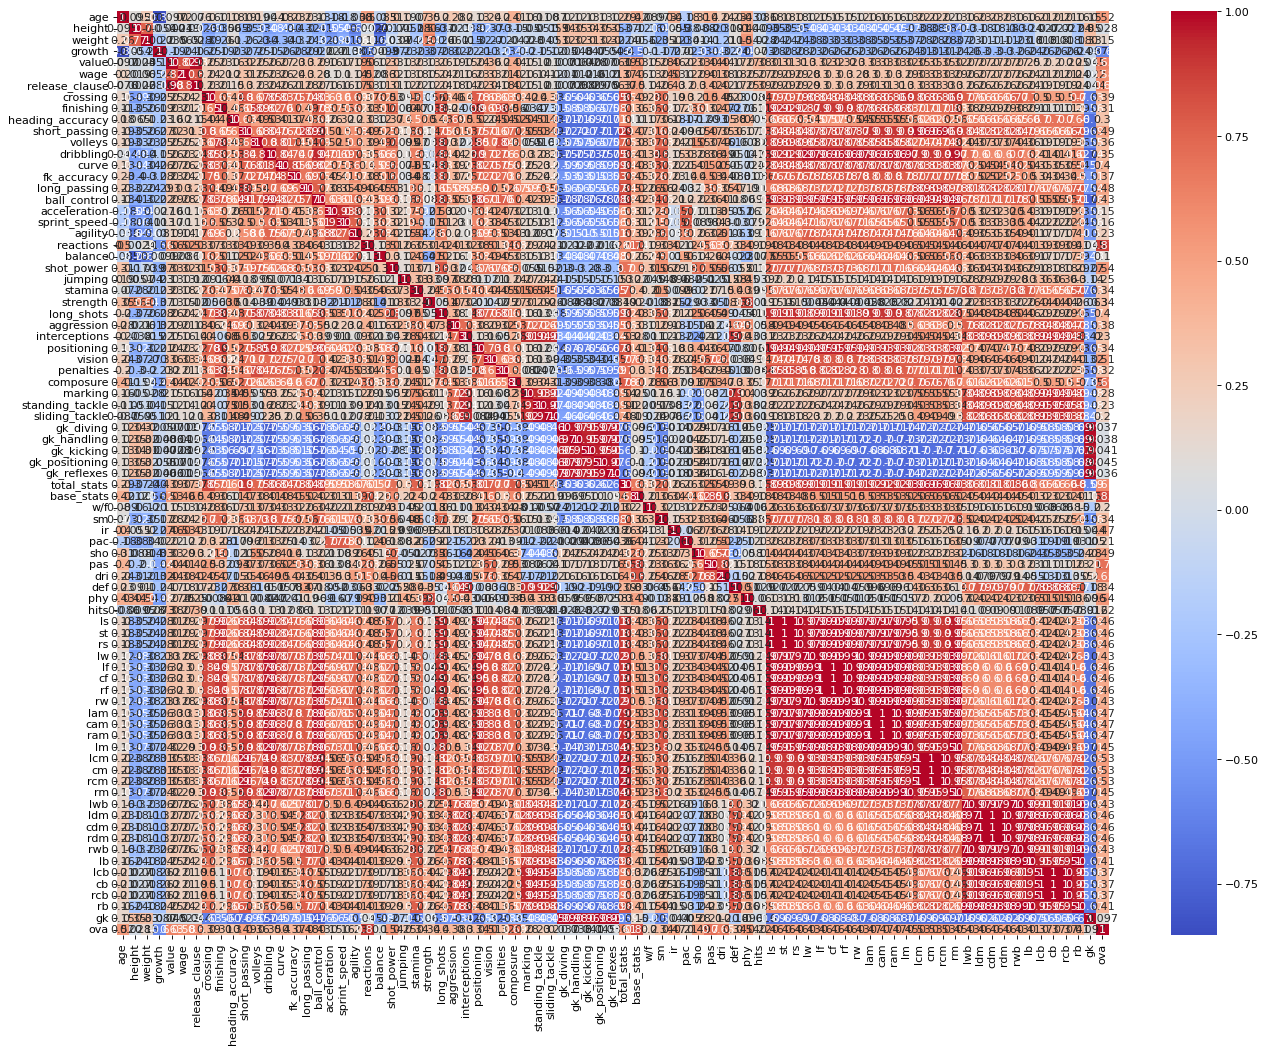

In [217]:
import seaborn as sns 
import matplotlib.pyplot as plt
correlations_matrix = data.corr()
plt.figure (figsize=(20,15), dpi=80)
sns.heatmap(correlations_matrix, annot=True, cmap="coolwarm")
plt.show()

In [218]:
correlations_matrix

,age,height,weight,growth,value,wage,release_clause,crossing,finishing,heading_accuracy,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
age,1.000000,0.095369,0.257338,-0.854136,0.096757,0.199411,0.076191,0.159280,0.110223,0.178446,...,0.229680,0.229680,0.159610,0.156077,0.212682,0.212682,0.212682,0.156077,0.153012,0.519799
height,0.095369,1.000000,0.768096,-0.053797,-0.002372,0.019131,-0.002615,-0.489884,-0.354624,0.065406,...,-0.176873,-0.176873,-0.297543,-0.236556,-0.026750,-0.026750,-0.026750,-0.236556,0.348912,0.028210
weight,0.257338,0.768096,1.000000,-0.219624,0.035361,0.064773,0.028059,-0.390750,-0.261982,0.100013,...,-0.111618,-0.111618,-0.230207,-0.180391,0.017899,0.017899,0.017899,-0.180391,0.328827,0.149397
growth,-0.854136,-0.053797,-0.219624,1.000000,-0.186735,-0.236945,-0.160722,-0.252015,-0.189302,-0.228983,...,-0.298201,-0.298201,-0.257067,-0.243794,-0.264081,-0.264081,-0.264081,-0.243794,-0.086584,-0.596642
value,0.096757,-0.002372,0.035361,-0.186735,1.000000,0.820164,0.978753,0.247968,0.228023,0.163170,...,0.269875,0.269875,0.268162,0.245128,0.199318,0.199318,0.199318,0.245128,0.044919,0.632303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cb,0.212682,-0.026750,0.017899,-0.264081,0.199318,0.214260,0.191405,0.496127,0.106514,0.697591,...,0.958695,0.958695,0.909470,0.949929,1.000000,1.000000,1.000000,0.949929,-0.564154,0.374577
rcb,0.212682,-0.026750,0.017899,-0.264081,0.199318,0.214260,0.191405,0.496127,0.106514,0.697591,...,0.958695,0.958695,0.909470,0.949929,1.000000,1.000000,1.000000,0.949929,-0.564154,0.374577
rb,0.156077,-0.236556,-0.180391,-0.243794,0.245128,0.239720,0.235042,0.702035,0.288111,0.660747,...,0.980695,0.980695,0.991403,1.000000,0.949929,0.949929,0.949929,1.000000,-0.666262,0.405280
gk,0.153012,0.348912,0.328827,-0.086584,0.044919,0.022117,0.043703,-0.629319,-0.560727,-0.696732,...,-0.619938,-0.619938,-0.691909,-0.666262,-0.564154,-0.564154,-0.564154,-0.666262,1.000000,0.097342


In [219]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11701.0,2.527049e+01,4.957640e+00,16.00,21.00,25.00,29.00,43.00
height,11701.0,1.812252e+02,6.913566e+00,154.94,175.26,180.34,185.42,205.74
weight,11701.0,7.451209e+01,7.122727e+00,52.65,69.30,74.25,79.20,109.35
growth,11701.0,5.534655e+00,5.810903e+00,-1.00,0.00,4.00,10.00,26.00
value,11701.0,2.543772e+06,5.267533e+06,0.00,375000.00,800000.00,2400000.00,90000000.00
...,...,...,...,...,...,...,...,...
cb,11701.0,5.311777e+01,1.457532e+01,16.00,43.00,55.00,65.00,88.00
rcb,11701.0,5.311777e+01,1.457532e+01,16.00,43.00,55.00,65.00,88.00
rb,11701.0,5.427442e+01,1.354206e+01,14.00,47.00,57.00,64.00,83.00
gk,11701.0,2.076540e+01,1.460670e+01,9.00,15.00,16.00,18.00,88.00


In [220]:
correlations_matrix = pd.DataFrame(data.corr())
correlations_matrix

,age,height,weight,growth,value,wage,release_clause,crossing,finishing,heading_accuracy,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
age,1.000000,0.095369,0.257338,-0.854136,0.096757,0.199411,0.076191,0.159280,0.110223,0.178446,...,0.229680,0.229680,0.159610,0.156077,0.212682,0.212682,0.212682,0.156077,0.153012,0.519799
height,0.095369,1.000000,0.768096,-0.053797,-0.002372,0.019131,-0.002615,-0.489884,-0.354624,0.065406,...,-0.176873,-0.176873,-0.297543,-0.236556,-0.026750,-0.026750,-0.026750,-0.236556,0.348912,0.028210
weight,0.257338,0.768096,1.000000,-0.219624,0.035361,0.064773,0.028059,-0.390750,-0.261982,0.100013,...,-0.111618,-0.111618,-0.230207,-0.180391,0.017899,0.017899,0.017899,-0.180391,0.328827,0.149397
growth,-0.854136,-0.053797,-0.219624,1.000000,-0.186735,-0.236945,-0.160722,-0.252015,-0.189302,-0.228983,...,-0.298201,-0.298201,-0.257067,-0.243794,-0.264081,-0.264081,-0.264081,-0.243794,-0.086584,-0.596642
value,0.096757,-0.002372,0.035361,-0.186735,1.000000,0.820164,0.978753,0.247968,0.228023,0.163170,...,0.269875,0.269875,0.268162,0.245128,0.199318,0.199318,0.199318,0.245128,0.044919,0.632303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cb,0.212682,-0.026750,0.017899,-0.264081,0.199318,0.214260,0.191405,0.496127,0.106514,0.697591,...,0.958695,0.958695,0.909470,0.949929,1.000000,1.000000,1.000000,0.949929,-0.564154,0.374577
rcb,0.212682,-0.026750,0.017899,-0.264081,0.199318,0.214260,0.191405,0.496127,0.106514,0.697591,...,0.958695,0.958695,0.909470,0.949929,1.000000,1.000000,1.000000,0.949929,-0.564154,0.374577
rb,0.156077,-0.236556,-0.180391,-0.243794,0.245128,0.239720,0.235042,0.702035,0.288111,0.660747,...,0.980695,0.980695,0.991403,1.000000,0.949929,0.949929,0.949929,1.000000,-0.666262,0.405280
gk,0.153012,0.348912,0.328827,-0.086584,0.044919,0.022117,0.043703,-0.629319,-0.560727,-0.696732,...,-0.619938,-0.619938,-0.691909,-0.666262,-0.564154,-0.564154,-0.564154,-0.666262,1.000000,0.097342


In [221]:
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

to_drop

['release_clause',
 'ball_control',
 'sprint_speed',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'def',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [222]:
# Drop features that have high correlation:
data = data.drop(["release_clause", "gk_handling","gk_kicking", "gk_positioning", "gk_reflexes", "gk"], axis=1)

In [223]:
# X-y split

y = data["ova"]
X = data.drop(["ova"], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [224]:
# Normalize (numerical)

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized

(11701, 74)


,age,height,weight,growth,value,wage,crossing,finishing,heading_accuracy,short_passing,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.370370,0.40,0.349206,0.074074,0.005833,0.007143,0.545455,0.478261,0.431818,0.720930,...,0.625000,0.614286,0.614286,0.614286,0.625000,0.637681,0.527778,0.527778,0.527778,0.637681
1,0.518519,0.55,0.333333,0.037037,0.094444,0.041071,0.681818,0.826087,0.806818,0.697674,...,0.597222,0.528571,0.528571,0.528571,0.597222,0.565217,0.444444,0.444444,0.444444,0.565217
2,0.629630,0.15,0.134921,0.037037,0.100000,0.087500,0.761364,0.793478,0.329545,0.813953,...,0.625000,0.571429,0.571429,0.571429,0.625000,0.565217,0.347222,0.347222,0.347222,0.565217
3,0.222222,0.45,0.277778,0.518519,0.003056,0.007143,0.431818,0.423913,0.602273,0.627907,...,0.583333,0.600000,0.600000,0.600000,0.583333,0.623188,0.583333,0.583333,0.583333,0.623188
4,0.259259,0.50,0.261905,0.333333,0.008056,0.003571,0.488636,0.369565,0.636364,0.697674,...,0.694444,0.685714,0.685714,0.685714,0.694444,0.710145,0.625000,0.625000,0.625000,0.710145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.60,0.404762,0.222222,0.006944,0.005357,0.636364,0.228261,0.522727,0.593023,...,0.680556,0.628571,0.628571,0.628571,0.680556,0.710145,0.625000,0.625000,0.625000,0.710145
11697,0.407407,0.60,0.452381,0.185185,0.017778,0.007143,0.068182,0.119565,0.090909,0.244186,...,0.152778,0.142857,0.142857,0.142857,0.152778,0.144928,0.138889,0.138889,0.138889,0.144928
11698,0.222222,0.25,0.206349,0.333333,0.012222,0.003571,0.659091,0.684783,0.522727,0.651163,...,0.486111,0.400000,0.400000,0.400000,0.486111,0.449275,0.263889,0.263889,0.263889,0.449275
11699,0.370370,0.65,0.492063,0.296296,0.000000,0.000000,0.659091,0.684783,0.522727,0.755814,...,0.722222,0.742857,0.742857,0.742857,0.722222,0.724638,0.611111,0.611111,0.611111,0.724638


In [225]:
X_cat = X_cat.drop(["name"], axis=1)

In [226]:
# One Hot/Label Encoding (categorical) to convert categorical variables into numerical
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)
X_cat_encode.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [227]:
# Concatenation of the two dataframes x_normalized and the X_cat_encode into one dataset
X = pd.concat([x_normalized, X_cat_encode ], axis=1)
display(X)

,age,height,weight,growth,value,wage,crossing,finishing,heading_accuracy,short_passing,...,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.370370,0.40,0.349206,0.074074,0.005833,0.007143,0.545455,0.478261,0.431818,0.720930,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.518519,0.55,0.333333,0.037037,0.094444,0.041071,0.681818,0.826087,0.806818,0.697674,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.629630,0.15,0.134921,0.037037,0.100000,0.087500,0.761364,0.793478,0.329545,0.813953,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.222222,0.45,0.277778,0.518519,0.003056,0.007143,0.431818,0.423913,0.602273,0.627907,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.259259,0.50,0.261905,0.333333,0.008056,0.003571,0.488636,0.369565,0.636364,0.697674,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.60,0.404762,0.222222,0.006944,0.005357,0.636364,0.228261,0.522727,0.593023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11697,0.407407,0.60,0.452381,0.185185,0.017778,0.007143,0.068182,0.119565,0.090909,0.244186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11698,0.222222,0.25,0.206349,0.333333,0.012222,0.003571,0.659091,0.684783,0.522727,0.651163,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11699,0.370370,0.65,0.492063,0.296296,0.000000,0.000000,0.659091,0.684783,0.522727,0.755814,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [228]:
#Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 93)
(2341, 93)
(9360,)
(2341,)


In [230]:
#Train/fit our model

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [231]:
# We analyze the "train part" and calculation of the r2 score
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9206220219949556

In [232]:
predictions

array([61.01953125, 72.03515625, 67.49414062, ..., 53.64257812,
       54.6484375 , 71.8046875 ])

In [233]:
# We analyze the "test part" and calculation of the r2 score
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9150030716490134

In [234]:
# Calculation of the MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

4.024651375452406

In [235]:
# Calculation of the RMSE
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

2.0061533778483653

In [236]:
# Calculation of the MAE
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

1.5363977066424606


In [237]:
data2 = pd.read_csv('fifa21_validate.csv')

In [238]:
data_cleaned = cleanup(data2)
data_cleaned.head()

,name,age,bp,height,weight,foot,growth,value,wage,release_clause,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,E. Palmer-Brown,23,CB,187.96,87.3,Right,7,975000.0,5000,0.0,...,61,61,59,61,67,67,67,61,16,67
1,D. Avdijaj,22,CAM,172.72,69.3,Right,5,1200000.0,3000,2200000.0,...,47,47,49,45,38,38,38,45,17,68
2,D. Ochoa,19,GK,187.96,79.2,Right,17,120000.0,500,249000.0,...,18,18,16,16,18,18,18,16,53,54
3,N. Kenneh,16,CDM,190.5,76.5,Right,23,160000.0,500,464000.0,...,54,54,53,53,54,54,54,53,11,55
4,E. Fernandes,24,CDM,187.96,76.5,Right,5,2300000.0,13000,4300000.0,...,72,72,70,69,68,68,68,69,18,70


In [239]:
# Drop features that have high correlation:
data_cleaned = data_cleaned.drop(["release_clause", "gk_handling","gk_kicking", "gk_positioning", "gk_reflexes", "gk"], axis=1)

In [240]:
# X-y split

y_val = data_cleaned["ova"]
X_val = data_cleaned.drop(["ova"], axis=1)
X_num_val = X_val.select_dtypes(include = np.number)
X_cat_val = X_val.select_dtypes(include = object)

In [241]:
# Normalize (numerical)

x_normalized_val = transformer.transform(X_num_val)
print(x_normalized_val.shape)
x_normalized_val = pd.DataFrame(x_normalized_val, columns=X_num_val.columns)
x_normalized_val

(1999, 74)


,age,height,weight,growth,value,wage,crossing,finishing,heading_accuracy,short_passing,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.259259,0.65,0.611111,0.296296,0.010833,0.008929,0.465909,0.195652,0.647727,0.604651,...,0.625000,0.642857,0.642857,0.642857,0.625000,0.681159,0.708333,0.708333,0.708333,0.681159
1,0.222222,0.35,0.293651,0.222222,0.013333,0.005357,0.636364,0.619565,0.443182,0.627907,...,0.486111,0.442857,0.442857,0.442857,0.486111,0.449275,0.305556,0.305556,0.305556,0.449275
2,0.111111,0.65,0.468254,0.666667,0.001333,0.000893,0.011364,0.021739,0.068182,0.151163,...,0.027778,0.028571,0.028571,0.028571,0.027778,0.028986,0.027778,0.027778,0.027778,0.028986
3,0.000000,0.70,0.420635,0.888889,0.001778,0.000893,0.363636,0.304348,0.568182,0.593023,...,0.541667,0.542857,0.542857,0.542857,0.541667,0.565217,0.527778,0.527778,0.527778,0.565217
4,0.296296,0.65,0.420635,0.222222,0.025556,0.023214,0.579545,0.608696,0.454545,0.813953,...,0.777778,0.800000,0.800000,0.800000,0.777778,0.797101,0.722222,0.722222,0.722222,0.797101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.185185,0.35,0.206349,0.444444,0.003611,0.001786,0.602273,0.217391,0.420455,0.500000,...,0.611111,0.514286,0.514286,0.514286,0.611111,0.637681,0.527778,0.527778,0.527778,0.637681
1995,0.185185,0.80,0.468254,0.370370,0.002111,0.001250,0.079545,0.065217,0.102273,0.302326,...,0.083333,0.100000,0.100000,0.100000,0.083333,0.086957,0.083333,0.083333,0.083333,0.086957
1996,0.407407,0.30,0.230159,0.037037,0.088889,0.016071,0.795455,0.750000,0.329545,0.825581,...,0.666667,0.628571,0.628571,0.628571,0.666667,0.623188,0.430556,0.430556,0.430556,0.623188
1997,0.666667,0.50,0.468254,0.037037,0.001556,0.007143,0.590909,0.445652,0.636364,0.627907,...,0.638889,0.657143,0.657143,0.657143,0.638889,0.666667,0.652778,0.652778,0.652778,0.666667


In [242]:
X_cat_val = X_cat_val.drop(["name"], axis=1)

In [243]:
# One Hot/Label Encoding (categorical) to convert categorical variables into numerical
from sklearn.preprocessing import OneHotEncoder
cols_val = encoder.get_feature_names_out(input_features=X_cat_val.columns)
X_cat_encode_val = pd.DataFrame(encoder.transform(X_cat_val).toarray(),columns=cols_val)
X_cat_encode_val

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [244]:
# Concatenation of the two dataframes x_normalized and the X_cat_encode into one dataset
X_val = pd.concat([x_normalized_val, X_cat_encode_val ], axis=1)
display(X_val)

,age,height,weight,growth,value,wage,crossing,finishing,heading_accuracy,short_passing,...,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.259259,0.65,0.611111,0.296296,0.010833,0.008929,0.465909,0.195652,0.647727,0.604651,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.222222,0.35,0.293651,0.222222,0.013333,0.005357,0.636364,0.619565,0.443182,0.627907,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.111111,0.65,0.468254,0.666667,0.001333,0.000893,0.011364,0.021739,0.068182,0.151163,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.000000,0.70,0.420635,0.888889,0.001778,0.000893,0.363636,0.304348,0.568182,0.593023,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.296296,0.65,0.420635,0.222222,0.025556,0.023214,0.579545,0.608696,0.454545,0.813953,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.185185,0.35,0.206349,0.444444,0.003611,0.001786,0.602273,0.217391,0.420455,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1995,0.185185,0.80,0.468254,0.370370,0.002111,0.001250,0.079545,0.065217,0.102273,0.302326,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1996,0.407407,0.30,0.230159,0.037037,0.088889,0.016071,0.795455,0.750000,0.329545,0.825581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1997,0.666667,0.50,0.468254,0.037037,0.001556,0.007143,0.590909,0.445652,0.636364,0.627907,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [245]:
# We analyze the "test part" and calculation of the r2 score
predictions_val = lm.predict(X_val)
r2_score(y_val, predictions_val)

0.9152008596863171

In [246]:
# Calculation of the MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_val,predictions_val)
mse

3.8805342517297468

In [247]:
# Calculation of the RMSE
rmse = np.sqrt(mean_squared_error(y_val,predictions_val))
rmse

1.9699071683025438

In [248]:
# Calculation of the MAE
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_val, predictions_val)
print(mae)

1.5133084120185092
